In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.head())
print(test_df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [42]:
#Training data has a column(id), which does not help in prediction, and can be removed

train_id = train_df['Id']
test_id = test_df['Id']

train_df.drop('Id', axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)

print(train_df.shape)
print(test_df.shape)


(1460, 80)
(1459, 79)


## Exploratory Data Analysis

### Study how data is distributed

Skewness: 1.882876
Kurtosis: 6.536282


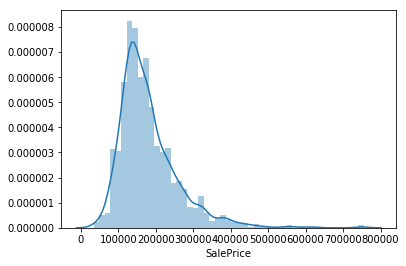

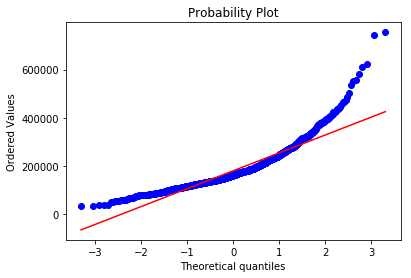

In [43]:
train_df.SalePrice.describe()
df = train_df
sns.distplot(df['SalePrice']);
print("Skewness: %f" % df['SalePrice'].skew()) # right skewed
print("Kurtosis: %f" % df['SalePrice'].kurt()) # measure of outliers - many outliers
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

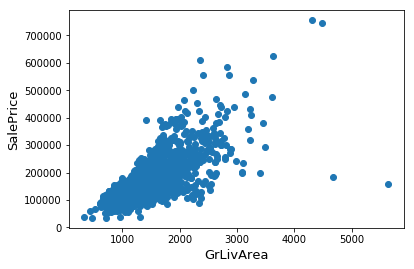

In [44]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

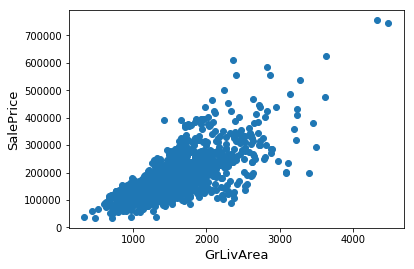

In [45]:
#remove the outliers at the bottom
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 12.02 and sigma = 0.40



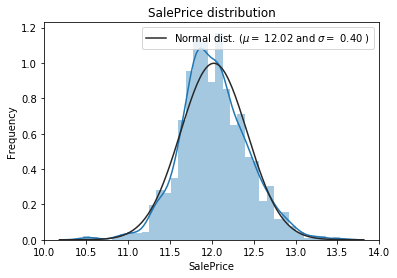

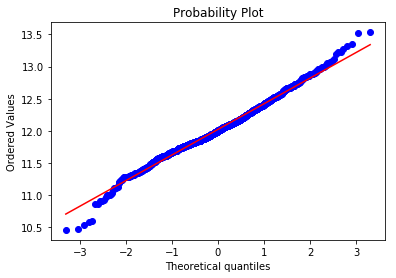

In [46]:
# Since the target data is skewed, it has to be normalized

df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

### Find if there are any missing data in the dataset

In [47]:
# # missing data in the training set

df = (df.isnull().sum() / len(df)) * 100
df = df.drop(df[df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df})
missing_data.head(20)

,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageYrBlt,5.555556
GarageType,5.555556
GarageFinish,5.555556
GarageQual,5.555556


In [48]:
#missing values in test dataset
t_df = test_df
t_df = (t_df.isnull().sum() / len(t_df)) * 100
t_df = t_df.drop(t_df[t_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio in test data' :t_df})
missing_data.head(20)

,Missing Ratio in test data
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageCond,5.346127
GarageQual,5.346127
GarageFinish,5.346127


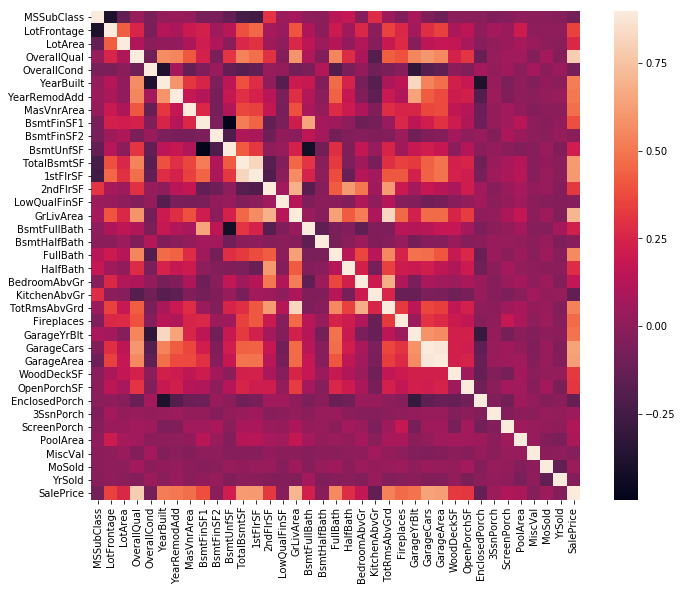

In [49]:
# Are these missing values impactful? A correlation graph may give a better picture

corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [50]:
# impute missing values

train_df['PoolQC'] = train_df['PoolQC'].fillna("None")
test_df['PoolQC'] = test_df['PoolQC'].fillna("None")

train_df['MiscFeature'] = train_df['MiscFeature'].fillna("None")
test_df['MiscFeature'] = test_df['MiscFeature'].fillna("None")

train_df['Alley'] = train_df['Alley'].fillna("None")
test_df['Alley'] = test_df['Alley'].fillna("None")

train_df['Fence'] = train_df['Fence'].fillna("None")
test_df['Fence'] = test_df['Fence'].fillna("None")

train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna("None")
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna("None")

train_df['GarageType'] = train_df['GarageType'].fillna("None")
test_df['GarageType'] = test_df['GarageType'].fillna("None")

train_df['GarageFinish'] = train_df['GarageFinish'].fillna("None")
test_df['GarageFinish'] = test_df['GarageFinish'].fillna("None")

train_df['GarageQual'] = train_df['GarageQual'].fillna("None")
test_df['GarageQual'] = test_df['GarageQual'].fillna("None")

train_df['GarageCond'] = train_df['GarageCond'].fillna("None")
test_df['GarageCond'] = test_df['GarageCond'].fillna("None")


for feature in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_df[feature] = train_df[feature].fillna(0)
    test_df[feature] = test_df[feature].fillna(0)

for feature in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_df[feature] = train_df[feature].fillna(0)
    test_df[feature] = test_df[feature].fillna(0)

train_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")
test_df['MasVnrType'] = test_df['MasVnrType'].fillna("None")

train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

In [51]:
# The feature LotFrontage takes the median value of the neighborhood

train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.median()))
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.median()))

In [52]:
# the most common value for MsZoning is 'RL', so filling the null values with 'RL'

train_df['MSZoning'] = train_df['MSZoning'].fillna(train_df['MSZoning'].mode()[0])
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

In [53]:
# The feature 'Utilities' has the value 'AllPub' for all the values except 2 that are NA. So this feature can be safely ignored

train_df = train_df.drop(['Utilities'], axis=1)
test_df = test_df.drop(['Utilities'], axis=1)

In [54]:
# For the feature 'Functional', NA means 'typical' according to the data description

train_df['Functional'] = train_df['Functional'].fillna('Typ')
test_df['Functional'] = test_df['Functional'].fillna('Typ')

In [55]:
# 'Electrical' has only one NA value, most of its values being 'SBrKr'

train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

In [56]:
#Similarly for 'KitchenQual', 'Exterior1st', 'Exterior2nd', and 'SaleType' features
train_df['KitchenQual'] = train_df['KitchenQual'].fillna(train_df['KitchenQual'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])

train_df['Exterior1st'] = train_df['Exterior1st'].fillna(train_df['Exterior1st'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])

train_df['Exterior2nd'] = train_df['Exterior2nd'].fillna(train_df['Exterior2nd'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])

train_df['SaleType'] = train_df['SaleType'].fillna(train_df['SaleType'].mode()[0])
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])


In [57]:
train_df['MSSubClass'] = train_df['MSSubClass'].fillna('None')
test_df['MSSubClass'] = test_df['MSSubClass'].fillna('None')

In [58]:
for feature in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_df[feature] = train_df[feature].fillna('None')
    test_df[feature] = test_df[feature].fillna('None')

In [59]:
# check the missing values again
df = train_df
df = (df.isnull().sum() / len(df)) * 100
df = df.drop(df[df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df})
missing_data.head(20)

,Missing Ratio


In [60]:
# missing values in test set
t_df = test_df
t_df = (t_df.isnull().sum() / len(t_df)) * 100
t_df = t_df.drop(t_df[t_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio in test data' :t_df})
missing_data.head(20)

,Missing Ratio in test data


## Feature Engineering

In [61]:
# Some features have numerical values, though they are categorical. So, converting them to string type
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)
test_df['MSSubClass'] = test_df['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
train_df['OverallCond'] = train_df['OverallCond'].astype(str)
test_df['OverallCond'] = test_df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train_df['YrSold'] = train_df['YrSold'].astype(str)
test_df['MoSold'] = test_df['MoSold'].astype(str)

In [63]:
# Perform label encoding on some categorical features
from sklearn.preprocessing import LabelEncoder

features = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for feature in features:
    lbl = LabelEncoder() 
    lbl.fit(list(train_df[feature].values)) 
    train_df[feature] = lbl.transform(list(train_df[feature].values))


In [65]:
# Label encode for test set
for feature in features:
    lbl.fit(list(test_df[feature].values)) 
    test_df[feature] = lbl.transform(list(test_df[feature].values))

In [72]:
# Find skewness in nuerical features
from scipy.stats import norm, skew

all_data = pd.concat((train_df, test_df)).reset_index(drop=True)

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
print(all_data.shape)


Skewness in numerical features: 

(2919, 79)


In [73]:
# Apply Box-Cox transformation to highly skewed features
from scipy.special import boxcox1p


skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features for which Box Cox transform has to be applied".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features for which Box Cox transform has to be applied


In [74]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [75]:
print(train_df.shape)

(1460, 79)
